In [23]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
df = pd.read_excel('Online Retail.xlsx')

In [3]:
# Display first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Check basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# Summary statistics
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
# Check for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
# rows and columns 
df.shape

(541909, 8)

In [10]:
# 135,080 rows out of 541,909 have null values in the CustomerID column.
# This means about 25% of CustomerID data is missing, which is significant.
# Dropping the CustomerID column
# This will reduces the dataset but ensures quality.

df = df.dropna(subset=['CustomerID'])

In [11]:
# Description column has 1,454 null values.
# 0.27% is very low, so it might not have a huge impact.
# Filling it with the most frequent description

df['Description'].fillna(df['Description'].mode()[0], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_12820\3076019398.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna(df['Description'].mode()[0], inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_12820\3076019398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description'].fillna(df['Description'].mode()[0],

In [12]:
# again checking for null values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
# Checking for duplicates
df.duplicated().sum()

5225

In [14]:
# Removing duplicates
df = df.drop_duplicates()

In [18]:
# CustomerID is stored as float64, which is unnecessary. Converting it to int64
df['CustomerID'] = df['CustomerID'].astype('int64')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int64         
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.6+ MB


In [20]:
# Creating new column TotalSales for better analysis

df['TotalSales'] = df['Quantity'] * df['UnitPrice']

In [21]:
# Extracting Date Components from InvoiceDate

df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Weekday'] = df['InvoiceDate'].dt.day_name()
df['Hours'] = df['InvoiceDate'].dt.hour

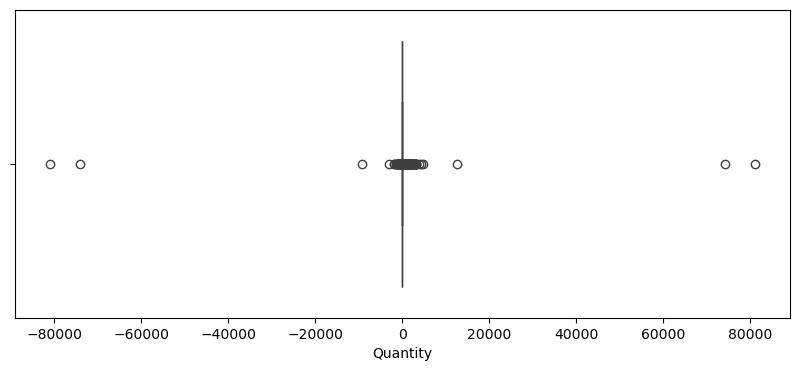

In [24]:
# Checking for Outliers in Quantity 
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Quantity'])  
plt.show()

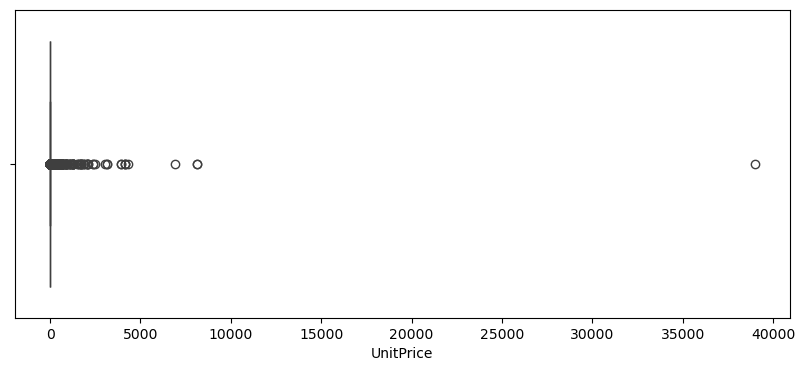

In [25]:
# Checking for Outliers in Price outliers
plt.figure(figsize=(10,4))
sns.boxplot(x=df['UnitPrice'])  
plt.show()

In [26]:
# Removing Outliers Using IQR (Interquartile Range)

Q1 = df[['Quantity', 'UnitPrice']].quantile(0.25)
Q3 = df[['Quantity', 'UnitPrice']].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[['Quantity', 'UnitPrice']] < (Q1 - 1.5 * IQR)) | (df[['Quantity', 'UnitPrice']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [31]:
# Saving clean dataset
df.to_csv('Online_Retail_Cleaned.csv')